# แยกรูปภาพ ผัก-ผลไม้ 36 ชนิด

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
'''for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
'''
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

"for dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n"

In [2]:
import matplotlib.pyplot as plt
from sklearn.metrics import *
import numpy as np

In [3]:
from tensorflow import keras 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2021-09-10 05:08:59.955343: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [4]:
train_path = '/kaggle/input/fruit-and-vegetable-image-recognition/train'
validation_path = '/kaggle/input/fruit-and-vegetable-image-recognition/validation'
test_path = '/kaggle/input/fruit-and-vegetable-image-recognition/test'

### ปรับขนาดค่าใน array

In [5]:
data_img = ImageDataGenerator(rescale=1/255.0 )

In [6]:
train_generator = data_img.flow_from_directory(train_path , target_size=(100,100) , batch_size=3581 )
validation_generator = data_img.flow_from_directory(validation_path , target_size=(100,100) , batch_size=351)
test_generator = data_img.flow_from_directory(test_path , target_size=(100,100)  , batch_size=359)

Found 3581 images belonging to 36 classes.
Found 351 images belonging to 36 classes.
Found 359 images belonging to 36 classes.


### รับรูปภาพเป็นค่า array และจัดเก็บลงตัวแปร

In [7]:
x_train , y_train = train_generator.next()

/opt/conda/lib/python3.7/site-packages/PIL/Image.py:974: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [8]:
x_val , y_val = validation_generator.next()

In [9]:
x_test , y_test = test_generator.next()

### ขนาดของชุดข้อมูลทั้ง 3 ชุด

In [10]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(3581, 100, 100, 3)
(351, 100, 100, 3)
(359, 100, 100, 3)


### สร้าง Model CNN

In [11]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32 , (3,3) ,input_shape=(100,100,3) , activation='relu'))
model.add(keras.layers.Conv2D(32 , (3,3) , activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Conv2D(64 , (3,3) , activation='relu'))
model.add(keras.layers.Conv2D(64 , (3,3) , activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Conv2D(128 , (3,3) , activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128 , activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(36 , activation='softmax'))

model.compile(optimizer='adam' , loss='categorical_crossentropy' , metrics=['accuracy'])

model.summary()



2021-09-10 05:13:12.217139: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-09-10 05:13:12.220553: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-09-10 05:13:12.268343: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-10 05:13:12.268992: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2021-09-10 05:13:12.269054: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-09-10 05:13:12.312174: I tensorflow/stream_executor/platform/def

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 44, 44, 64)        3

### Model Training

In [12]:
model_history = model.fit(x_train , y_train , validation_data=(x_val , y_val) , epochs=20 )

2021-09-10 05:13:14.745836: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-09-10 05:13:14.759689: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2000175000 Hz


Epoch 1/20


2021-09-10 05:13:15.833783: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2021-09-10 05:13:16.657951: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2021-09-10 05:13:16.690237: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8


112/112 [==============================] - 10s 26ms/step - loss: 4.0786 - accuracy: 0.0860 - val_loss: 5.2137 - val_accuracy: 0.0313
Epoch 2/20
112/112 [==============================] - 2s 15ms/step - loss: 2.8127 - accuracy: 0.2316 - val_loss: 4.4523 - val_accuracy: 0.0570
Epoch 3/20
112/112 [==============================] - 2s 15ms/step - loss: 2.4619 - accuracy: 0.3130 - val_loss: 3.5730 - val_accuracy: 0.1140
Epoch 4/20
112/112 [==============================] - 2s 15ms/step - loss: 2.1569 - accuracy: 0.3741 - val_loss: 2.1400 - val_accuracy: 0.3248
Epoch 5/20
112/112 [==============================] - 2s 15ms/step - loss: 2.0075 - accuracy: 0.4218 - val_loss: 0.9075 - val_accuracy: 0.8063
Epoch 6/20
112/112 [==============================] - 2s 15ms/step - loss: 1.7813 - accuracy: 0.4935 - val_loss: 1.0050 - val_accuracy: 0.7407
Epoch 7/20
112/112 [==============================] - 2s 15ms/step - loss: 1.5107 - accuracy: 0.5641 - val_loss: 0.7097 - val_accuracy: 0.8433
Epoch 8/2

### loss rate ของข้อมูลชุดฝึกและชุดตรวจสอบ

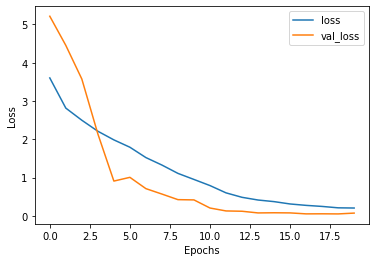

In [13]:
plt.plot(model_history.history['loss'] , label='loss')
plt.plot(model_history.history['val_loss'] , label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

### accuracy rate ของข้อมูลชุดฝึกและชุดตรวจสอบ

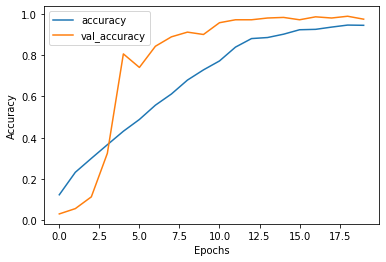

In [14]:
plt.plot(model_history.history['accuracy'] , label='accuracy')
plt.plot(model_history.history['val_accuracy'] , label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

### Model Evaluation

In [15]:
model.evaluate(x_test , y_test)

12/12 [==============================] - 0s 10ms/step - loss: 0.0694 - accuracy: 0.9749


[0.06941438466310501, 0.9749303460121155]

### ทดสอบโดยข้อมูลชุดทดสอบ ได้ค่า accuracy 97.49 %

### จากรูปภาพข้อมูลชุดทดสอบ 359 รูปภาพ เรามาดูรูปภาพที่ทำนายผิดกัน

In [16]:
class_name = pd.DataFrame(train_generator.class_indices.items() , columns=['name' , 'class'])
class_name.head()

,name,class
0,apple,0
1,banana,1
2,beetroot,2
3,bell pepper,3
4,cabbage,4


In [17]:
class_name['name'][0]

'apple'

In [18]:
np.argmax(y_test[0])

1

In [19]:
def img_show(img_num) :
    plt.imshow(x_test[img_num])
    plt.title(class_name['name'][np.argmax(y_test[img_num])])
    plt.show()

### ตัวอย่างรูปภาพ และ ชื่อที่ถูกต้อง

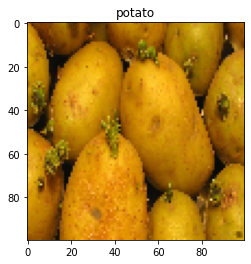

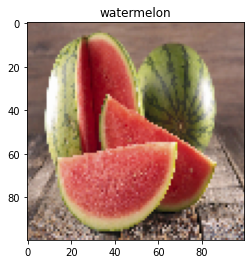

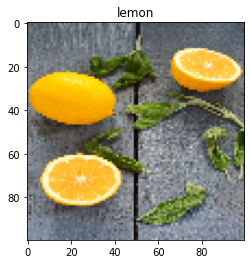

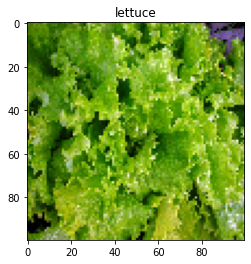

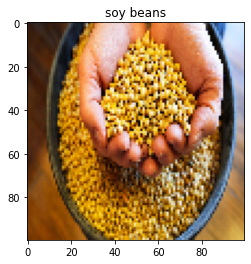

In [20]:
for i in np.random.randint(1,300,5) :
    img_show(i)

In [21]:
prediction = model.predict(x_test)

In [22]:
lis_mistake = []
for i in range(len(x_test)) :
    if np.argmax(y_test , axis=1)[i] != np.argmax(prediction , axis=1)[i] :
        lis_mistake.append(i)

In [23]:
len(lis_mistake)

9

### จำนวนรูปภาพที่ทำนายผิด มี 9 รูป

In [24]:
def img_predict(img_num) :
    plt.imshow(x_test[img_num])
    plt.title(f"Actuality = {class_name['name'][np.argmax(y_test[img_num])]}  \n Prediction = {class_name['name'][np.argmax(model.predict(x_test[[img_num]]))]}")
    plt.show()

### รูปภาพที่ทำนายผิด

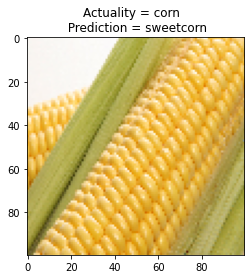

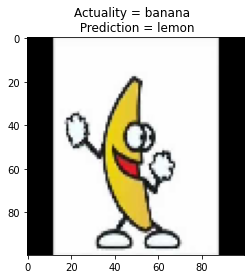

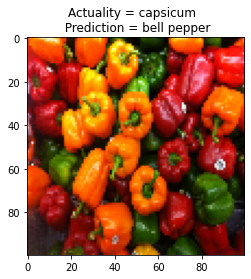

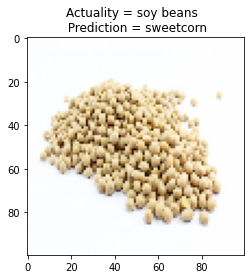

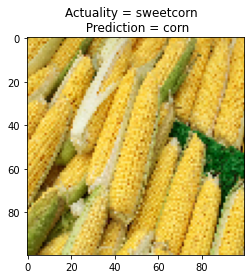

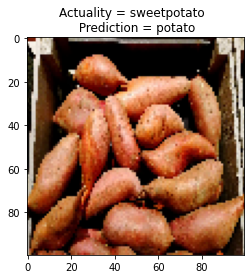

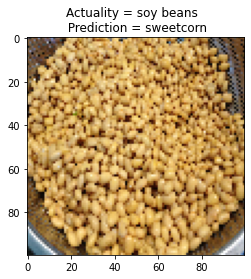

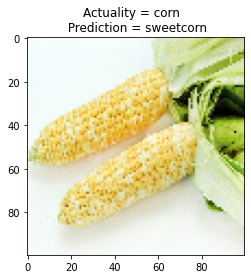

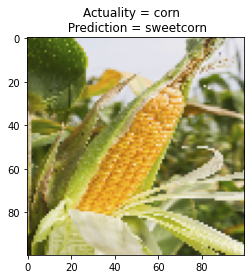

In [25]:
for i in lis_mistake :
    img_predict(i)

### ส่วนใหญ่ความผิดพลาดคือ การสับสนระหว่าง Corn และ Sweetcorn ซึ่งมีความคล้ายกันมาก